In [66]:
import h5py, os, nilearn
import matplotlib.pyplot as plt
import numpy as np
#from nilearn import input_data, datasets, plotting
from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import view_img_on_surf, view_img
from nltools.stats import isc, threshold, fdr
from tqdm import tqdm
import pandas as pd
import re

In [67]:
ls

00_SaveEpisodes.ipynb     02_Load_ISC_plot.ipynb
01_ISC_allepisodes.ipynb  test_ISC_s01_e01.nii


In [68]:
isc_result_folder_path = '../data/01_isc_results/'
files = sorted(os.listdir(isc_result_folder_path))
files

['isc_task-s01e01a.npy',
 'isc_task-s01e01b.npy',
 'isc_task-s01e02a.npy',
 'isc_task-s01e02b.npy',
 'isc_task-s01e03a.npy',
 'isc_task-s01e03b.npy',
 'isc_task-s01e04a.npy',
 'isc_task-s01e04b.npy',
 'isc_task-s01e05a.npy',
 'isc_task-s01e05b.npy',
 'isc_task-s01e06a.npy',
 'isc_task-s01e06b.npy',
 'isc_task-s01e07a.npy',
 'isc_task-s01e07b.npy',
 'isc_task-s01e08a.npy',
 'isc_task-s01e08b.npy',
 'isc_task-s01e09a.npy',
 'isc_task-s01e09b.npy',
 'isc_task-s01e10a.npy',
 'isc_task-s01e10b.npy',
 'isc_task-s01e11a.npy',
 'isc_task-s01e11b.npy',
 'isc_task-s01e12a.npy',
 'isc_task-s01e12b.npy',
 'isc_task-s01e13a.npy',
 'isc_task-s01e13b.npy',
 'isc_task-s01e14a.npy',
 'isc_task-s01e14b.npy',
 'isc_task-s01e15a.npy',
 'isc_task-s01e15b.npy',
 'isc_task-s01e16a.npy',
 'isc_task-s01e16b.npy',
 'isc_task-s01e17a.npy',
 'isc_task-s01e17b.npy',
 'isc_task-s01e18a.npy',
 'isc_task-s01e18b.npy',
 'isc_task-s01e19a.npy',
 'isc_task-s01e19b.npy',
 'isc_task-s01e20a.npy',
 'isc_task-s01e20b.npy',


In [34]:
isc_results = []
for current_file in files:
    f_to_load = isc_result_folder_path + current_file
    isc_results.append(np.load(f_to_load))

isc_results = np.asarray(isc_results)
isc_results.shape

(280, 1000)

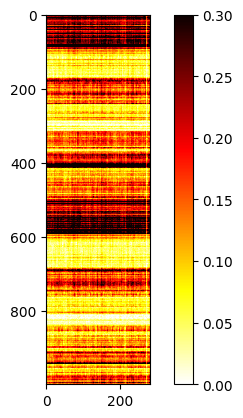

In [57]:
plt.imshow(isc_results.T, vmin = 0., vmax = 0.3, cmap = 'hot_r')
plt.colorbar()

(0.0, 0.5)

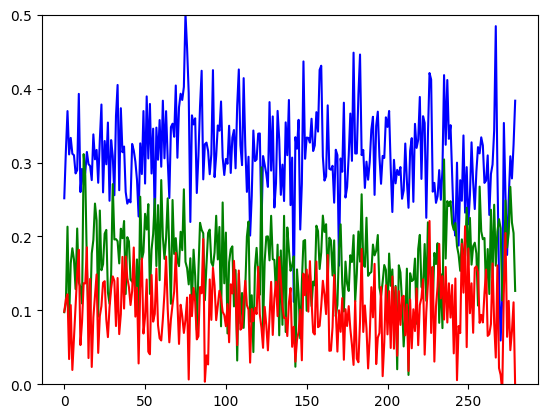

In [49]:
plt.plot(isc_results[:, 598], 'blue')
plt.plot(isc_results[:, 545], 'green')
plt.plot(isc_results[:, 920], 'red')
plt.plot(isc_results[:, 150], 'yellow')

plt.ylim([0, 0.5])

In [64]:
from scipy import stats

t_statistic, p_value = stats.ttest_1samp(isc_results[:, 920], 0)
t_statistic
p_value

2.3111427452758844e-110

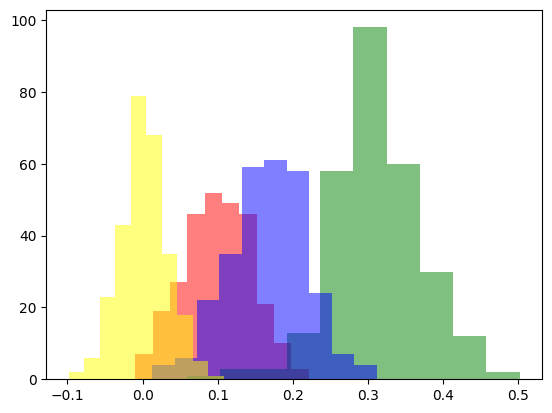

In [59]:
plt.hist(isc_results[:, 920], color = 'red', alpha = 0.5);
plt.hist(isc_results[:, 598], color = 'green', alpha = 0.5);
plt.hist(isc_results[:, 545], color = 'blue', alpha = 0.5);
plt.hist(isc_results[:, 820], color = 'yellow', alpha = 0.5);

<Axes: >

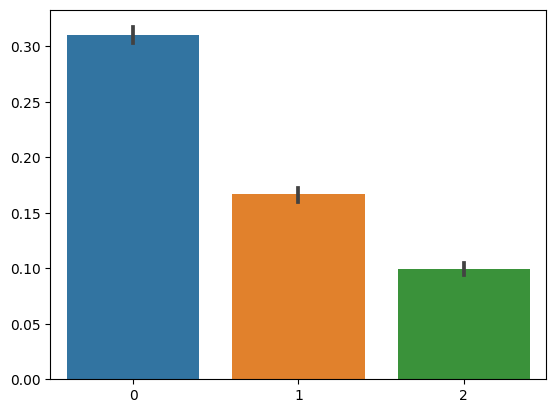

In [13]:
roi_labels = [ 'auditory cortex',  'visual cortex', 'TPJ',]
roi_nums = [598, 545, 920]   # 598 auditory   # 920 tpj    545 visual
selection = isc_results[:, roi_nums]
sel_df = pd.DataFrame(selection)
import seaborn as sns

sns.barplot(sel_df)

### Plot

In [16]:
schaefer = nilearn.datasets.fetch_atlas_schaefer_2018(n_rois=1000, yeo_networks=7, resolution_mm=1, data_dir=None, base_url=None, resume=True, verbose=1)
schaefer_rois_file       = schaefer['maps']

# set up mask
mask = Brain_Data(schaefer['maps'])
mask_x = expand_mask(mask)

/Users/schmaelz/miniconda3/lib/python3.10/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


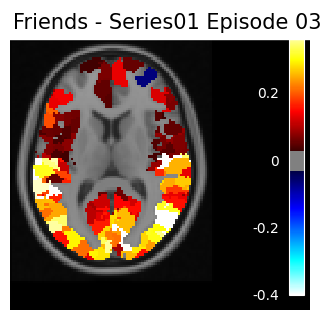

In [22]:
one_isc_result = isc_results[0, :]
#one_isc_result = np.reshape(one_isc_result, (1000,1))
one_isc_result.shape

isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
#result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

# visualize results
fig = plt.figure(figsize=(3, 3))
nilearn.plotting.plot_stat_map(    isc_r_brain, 
                                       bg_img       = '../data/MNI152_T1_2mm.nii.gz',
                                       threshold    = 0.03,  #additional threshold for visualization
                                       vmax         = 0.4, 
                                       draw_cross   = False,
                                       display_mode = 'z',
                                       cut_coords   = [10],
                                       annotate     = False,
                                       figure = fig,
                                       title = 'Friends - Series01 Episode 03');

In [43]:
files[48:96:2]

['isc_task-s02e01a.npy',
 'isc_task-s02e02a.npy',
 'isc_task-s02e03a.npy',
 'isc_task-s02e04a.npy',
 'isc_task-s02e05a.npy',
 'isc_task-s02e06a.npy',
 'isc_task-s02e07a.npy',
 'isc_task-s02e08a.npy',
 'isc_task-s02e09a.npy',
 'isc_task-s02e10a.npy',
 'isc_task-s02e11a.npy',
 'isc_task-s02e12a.npy',
 'isc_task-s02e13a.npy',
 'isc_task-s02e14a.npy',
 'isc_task-s02e15a.npy',
 'isc_task-s02e16a.npy',
 'isc_task-s02e17a.npy',
 'isc_task-s02e18a.npy',
 'isc_task-s02e19a.npy',
 'isc_task-s02e20a.npy',
 'isc_task-s02e21a.npy',
 'isc_task-s02e22a.npy',
 'isc_task-s02e23a.npy',
 'isc_task-s02e24a.npy']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


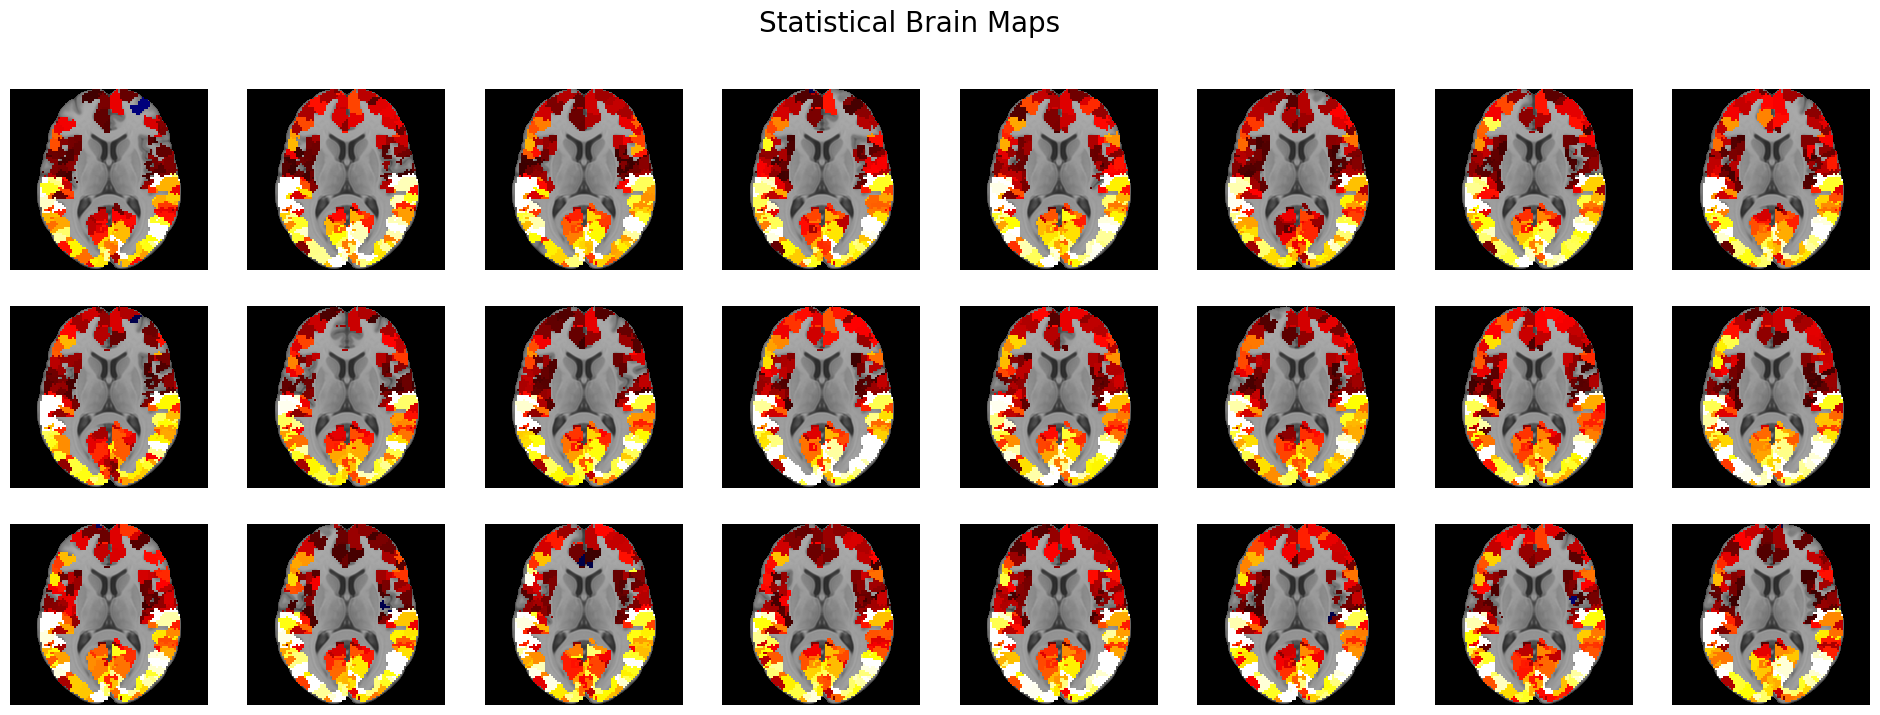

In [41]:
import matplotlib.pyplot as plt
from nilearn import plotting, datasets, image
import numpy as np

isc_results2 = isc_results[0:48:2, :] 

# Example: Load MNI template as background (use your own)
bg_img = datasets.load_mni152_template()

# Placeholder: list of 25 brain images (stat maps)
# Replace these with your actual NIfTI files or Nifti1Image objects

# Set up a 5x5 grid of matplotlib axes
fig, axes = plt.subplots(3, 8, figsize=(24, 8))
fig.suptitle("Statistical Brain Maps", fontsize=20)
axes = axes.flatten()

# Loop and plot each map
for i, ax in enumerate(axes):
    print(i)
    one_isc_result = isc_results2[i, :]
    
    isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
    #result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

    
    plotting.plot_stat_map( isc_r_brain,
                            bg_img=bg_img,
                            threshold    = 0.03,  #additional threshold for visualization
                            vmax         = 0.4, 
                            display_mode = 'z',
                            cut_coords   = [10],
                            colorbar=False,
                            axes=ax,
                            annotate=False)

# Avoid overlap
#plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


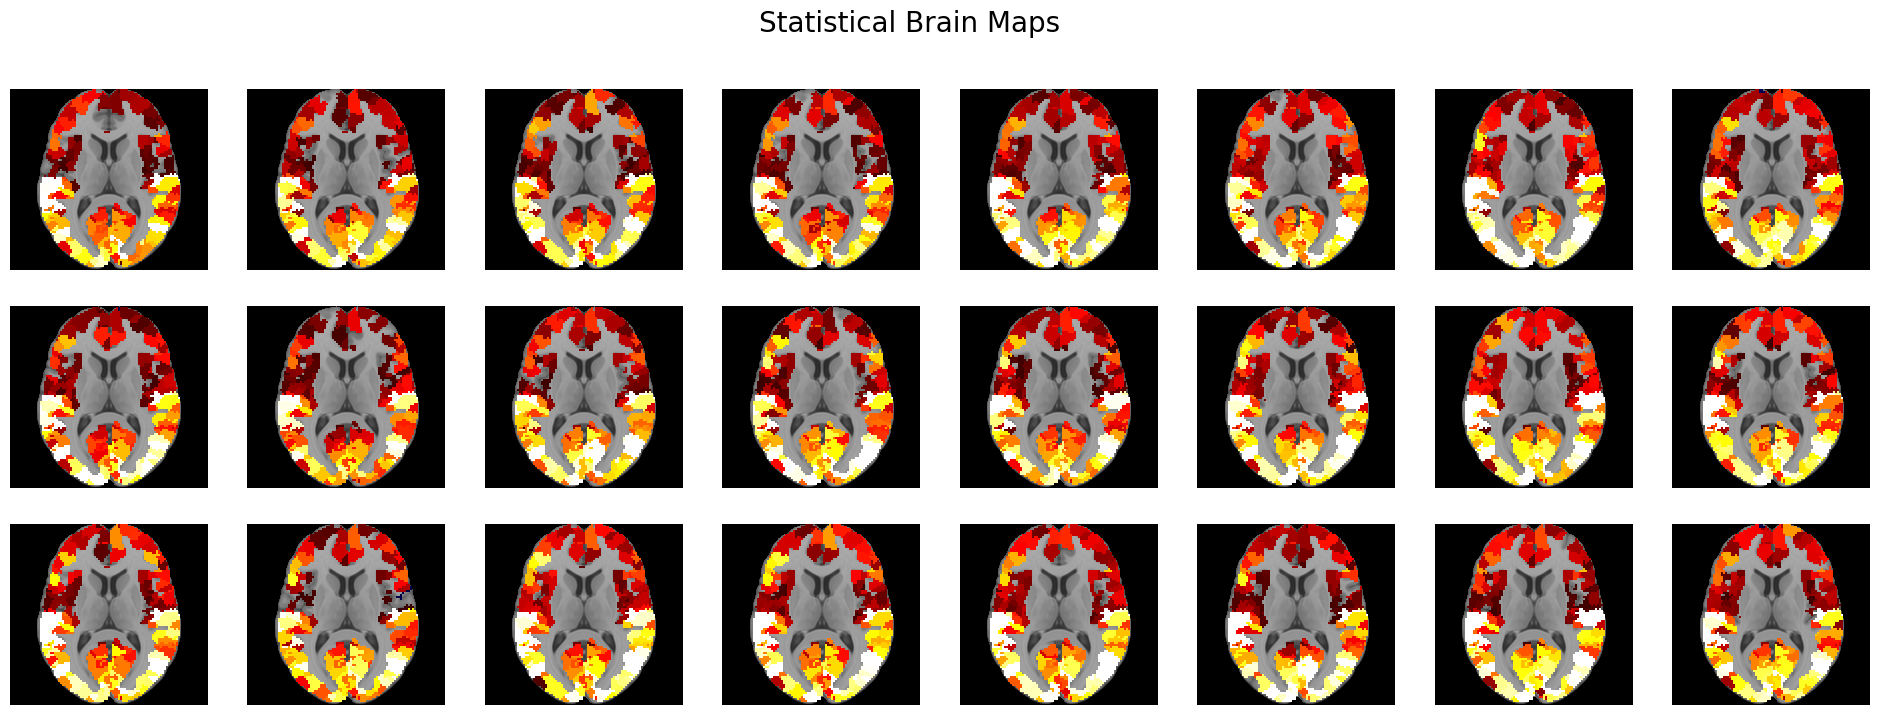

In [44]:
import matplotlib.pyplot as plt
from nilearn import plotting, datasets, image
import numpy as np

isc_results2 = isc_results[48:96:2, :] 

# Example: Load MNI template as background (use your own)
bg_img = datasets.load_mni152_template()

# Placeholder: list of 25 brain images (stat maps)
# Replace these with your actual NIfTI files or Nifti1Image objects

# Set up a 5x5 grid of matplotlib axes
fig, axes = plt.subplots(3, 8, figsize=(24, 8))
fig.suptitle("Statistical Brain Maps", fontsize=20)
axes = axes.flatten()

# Loop and plot each map
for i, ax in enumerate(axes):
    print(i)
    one_isc_result = isc_results2[i, :]
    
    isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
    #result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

    
    plotting.plot_stat_map( isc_r_brain,
                            bg_img=bg_img,
                            threshold    = 0.03,  #additional threshold for visualization
                            vmax         = 0.4, 
                            display_mode = 'z',
                            cut_coords   = [10],
                            colorbar=False,
                            axes=ax,
                            annotate=False)

# Avoid overlap
#plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [71]:
files[234:280:2]

['isc_task-s05e23c.npy',
 'isc_task-s06e01a.npy',
 'isc_task-s06e02a.npy',
 'isc_task-s06e04a.npy',
 'isc_task-s06e05a.npy',
 'isc_task-s06e06a.npy',
 'isc_task-s06e07a.npy',
 'isc_task-s06e08a.npy',
 'isc_task-s06e09a.npy',
 'isc_task-s06e10a.npy',
 'isc_task-s06e11a.npy',
 'isc_task-s06e12a.npy',
 'isc_task-s06e13a.npy',
 'isc_task-s06e14a.npy',
 'isc_task-s06e15a.npy',
 'isc_task-s06e15c.npy',
 'isc_task-s06e17a.npy',
 'isc_task-s06e18a.npy',
 'isc_task-s06e19a.npy',
 'isc_task-s06e20a.npy',
 'isc_task-s06e21a.npy',
 'isc_task-s06e22a.npy',
 'isc_task-s06e23a.npy']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


IndexError: index 23 is out of bounds for axis 0 with size 23

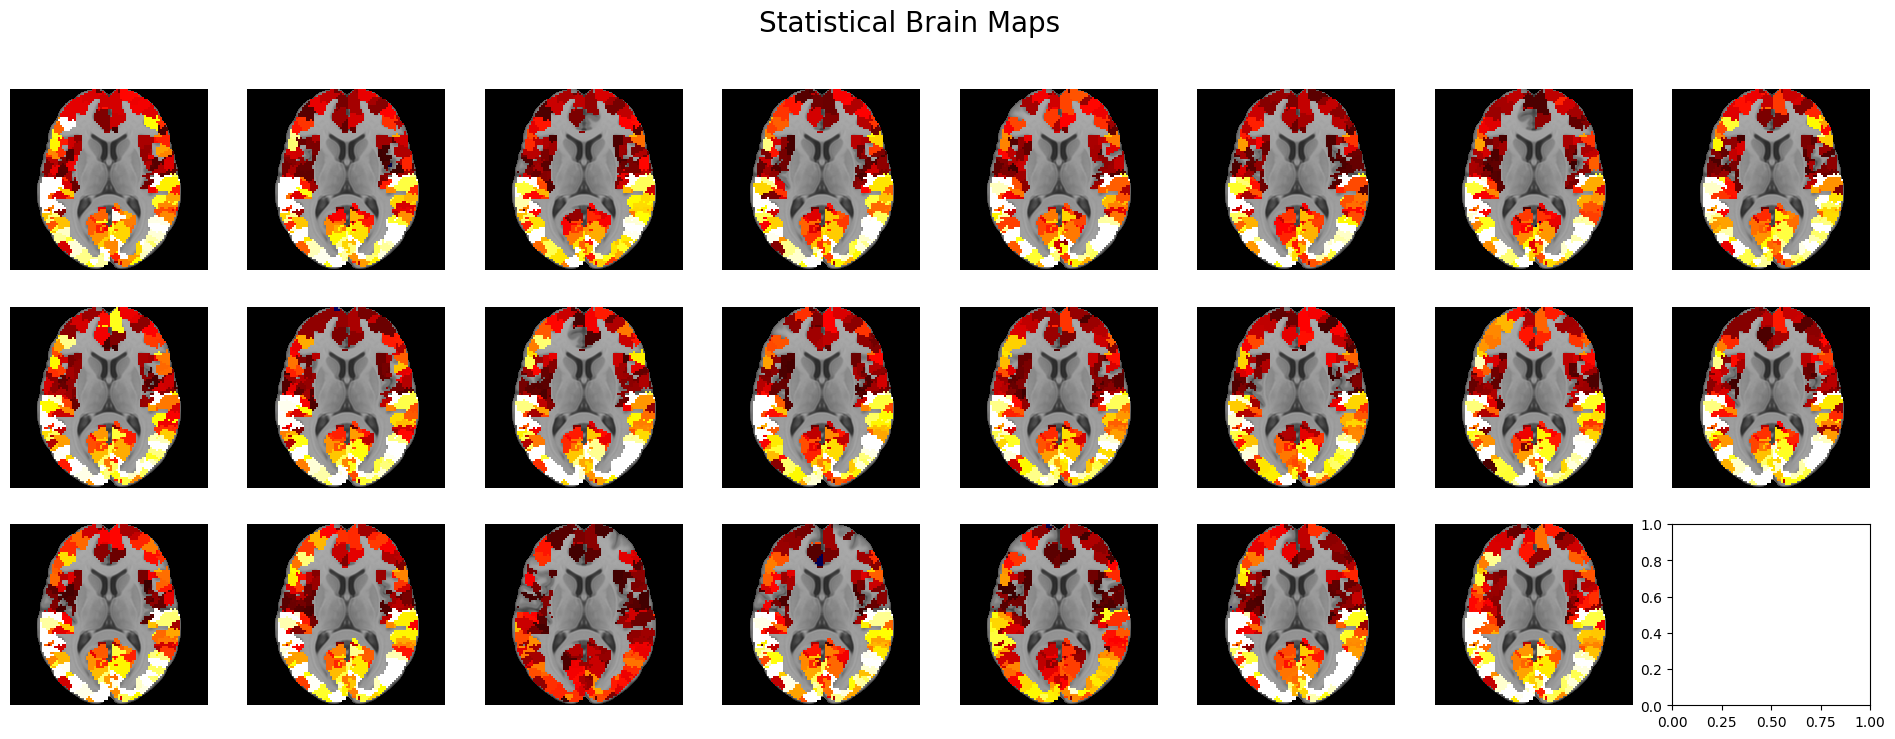

In [72]:
import matplotlib.pyplot as plt
from nilearn import plotting, datasets, image
import numpy as np

isc_results2 = isc_results[234:280:2, :] 

# Example: Load MNI template as background (use your own)
bg_img = datasets.load_mni152_template()

# Placeholder: list of 25 brain images (stat maps)
# Replace these with your actual NIfTI files or Nifti1Image objects

# Set up a 5x5 grid of matplotlib axes
fig, axes = plt.subplots(3, 8, figsize=(24, 8))
fig.suptitle("Statistical Brain Maps", fontsize=20)
axes = axes.flatten()

# Loop and plot each map
for i, ax in enumerate(axes):
    print(i)
    one_isc_result = isc_results2[i, :]
    
    isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
    #result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

    
    plotting.plot_stat_map( isc_r_brain,
                            bg_img=bg_img,
                            threshold    = 0.03,  #additional threshold for visualization
                            vmax         = 0.4, 
                            display_mode = 'z',
                            cut_coords   = [10],
                            colorbar=False,
                            axes=ax,
                            annotate=False)

# Avoid overlap
#plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from nilearn import plotting, datasets, image
import numpy as np

isc_results2 = isc_results[0:48:2, :] 

# Example: Load MNI template as background (use your own)
bg_img = datasets.load_mni152_template()

# Placeholder: list of 25 brain images (stat maps)
# Replace these with your actual NIfTI files or Nifti1Image objects

# Set up a 5x5 grid of matplotlib axes
fig, axes = plt.subplots(3, 8, figsize=(24, 8))
fig.suptitle("Statistical Brain Maps", fontsize=20)
axes = axes.flatten()

# Loop and plot each map
for i, ax in enumerate(axes):
    print(i)
    one_isc_result = isc_results2[i, :]
    
    isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
    #result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

    
    plotting.plot_stat_map( isc_r_brain,
                            bg_img=bg_img,
                            threshold    = 0.03,  #additional threshold for visualization
                            vmax         = 0.4, 
                            display_mode = 'z',
                            cut_coords   = [10],
                            colorbar=False,
                            axes=ax,
                            annotate=False)

# Avoid overlap
#plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


0.8705387593784644

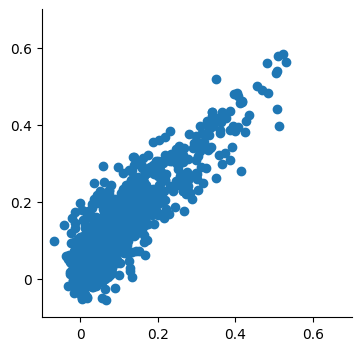

In [73]:
plt.figure(figsize = (4,4))
plt.scatter( isc_results[0, :],
             isc_results[48, :])
plt.xlim([-0.1, 0.7])
plt.ylim([-0.1, 0.7])
plt.xticks([0, 0.2, 0.4, 0.6], [0, 0.2, 0.4, 0.6])
plt.yticks([0, 0.2, 0.4, 0.6], [0, 0.2, 0.4, 0.6])
sns.despine()
np.corrcoef( isc_results[0, :],
             isc_results[48, :])[0,1]

In [75]:
isc_results[-1]

array([ 5.12104039e-02,  2.51832648e-01,  2.07080124e-01,  2.76699077e-01,
        2.32804083e-01,  1.92667666e-01,  1.08957291e-01,  4.35872901e-01,
        2.89041523e-01,  4.20445161e-01,  4.05179641e-01,  3.65479805e-01,
        3.06051811e-01,  3.34276043e-01,  1.86408985e-01,  3.10663179e-01,
        3.70345114e-01,  8.77686227e-02,  1.02154135e-01,  1.38898330e-01,
        3.92164844e-01,  8.84953793e-02,  4.50077147e-01,  2.68258233e-01,
        1.62555321e-01,  3.26258893e-01,  3.35679344e-01,  1.84423950e-01,
        4.57061849e-01,  2.86183489e-01,  8.83373240e-02,  1.72899735e-01,
        2.74312521e-01,  4.04652546e-01,  4.47135740e-01,  4.40646937e-01,
        2.42808465e-01,  1.98709992e-01,  3.73310092e-01,  2.43309372e-01,
        1.16710358e-01,  4.58108853e-01,  5.24788444e-01,  3.49650331e-01,
        1.20446032e-01,  1.73765040e-01,  3.49693926e-01,  1.37209232e-01,
        4.42687311e-01,  9.59098448e-02,  4.01887513e-01,  4.14462477e-01,
        4.36523963e-01,  

array([[1.        , 0.85846409],
       [0.85846409, 1.        ]])

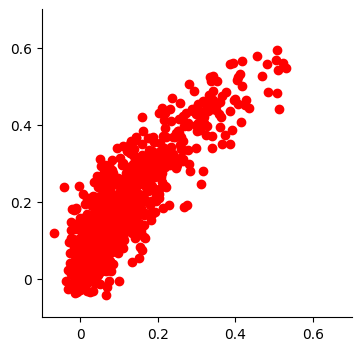

In [77]:
plt.figure(figsize = (4,4))
plt.scatter( isc_results[0, :],
             isc_results[-1], color = 'r')
plt.xlim([-0.1, 0.7])
plt.ylim([-0.1, 0.7])
plt.xticks([0, 0.2, 0.4, 0.6], [0, 0.2, 0.4, 0.6])
plt.yticks([0, 0.2, 0.4, 0.6], [0, 0.2, 0.4, 0.6])
sns.despine()
np.corrcoef( isc_results[0, :],
             isc_results[-1])

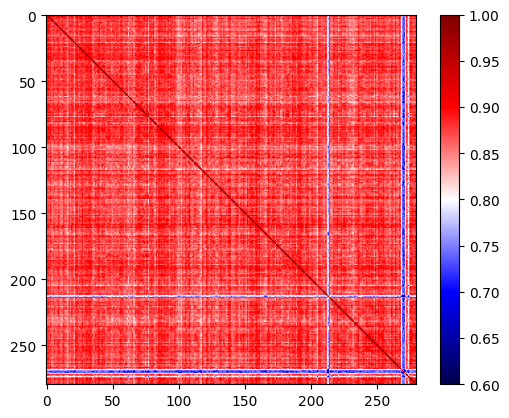

In [84]:
plt.imshow(np.corrcoef(isc_results), vmin = 0.6, vmax = 1, cmap = 'seismic')
plt.colorbar()

0.8670668746804299


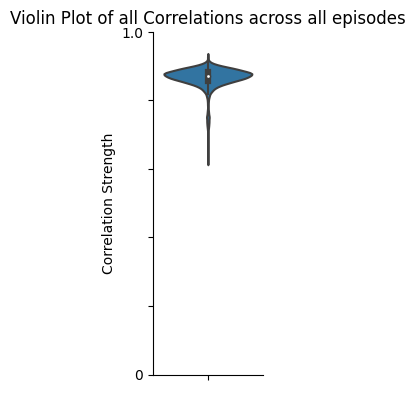

In [97]:
A = np.corrcoef(isc_results)
rows, cols = np.tril_indices(A.shape[0], k=-1)
lower_tri = A[rows, cols]
lower_tri
print(np.mean(lower_tri))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a large vector


# Violin plot
plt.figure(figsize=(2, 4))
sns.violinplot(y=lower_tri)
plt.title("Violin Plot of all Correlations across all episodes")
plt.ylabel("Correlation Strength")
plt.grid(False)
plt.tight_layout()
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.], [0, "", "","", "", 1.])

sns.despine()
plt.show()


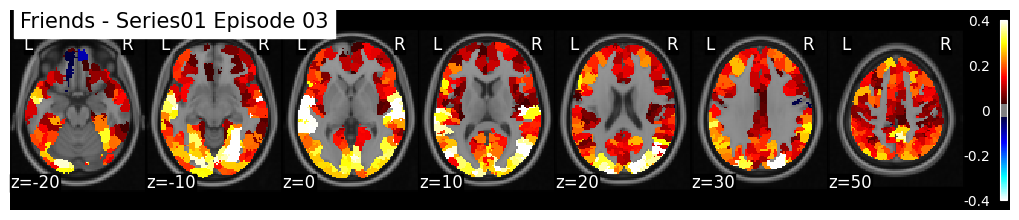

In [27]:
one_isc_result = isc_results[100, :]
#one_isc_result = np.reshape(one_isc_result, (1000,1))
one_isc_result.shape

isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
#result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

# visualize results
fig = plt.figure(figsize=(10, 2))
nilearn.plotting.plot_stat_map(    isc_r_brain, 
                                       bg_img       = './MNI152_T1_2mm.nii.gz',
                                       threshold    = 0.03,  #additional threshold for visualization
                                       vmax         = 0.4, 
                                       draw_cross   = False,
                                       display_mode = 'z',
                                       cut_coords   = [ -20, -10, 0, 10, 20, 30, 50],
                                       annotate     = True,
                                       figure = fig,
                                       title = 'Friends - Series01 Episode 03');

In [28]:
one_isc_result.shape

(1000,)

/Users/schmaelz/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/schmaelz/miniconda3/lib/python3.10/site-packages/nilearn/image/resampling.py:291: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



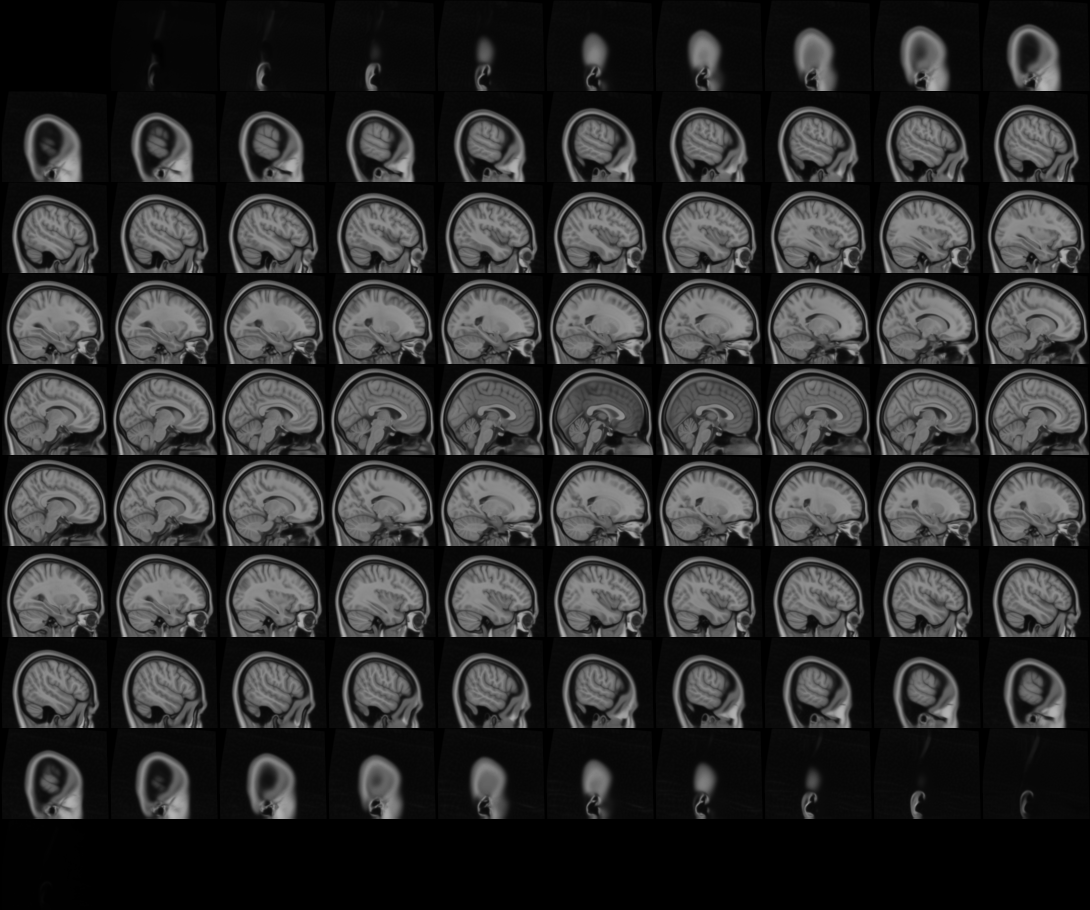
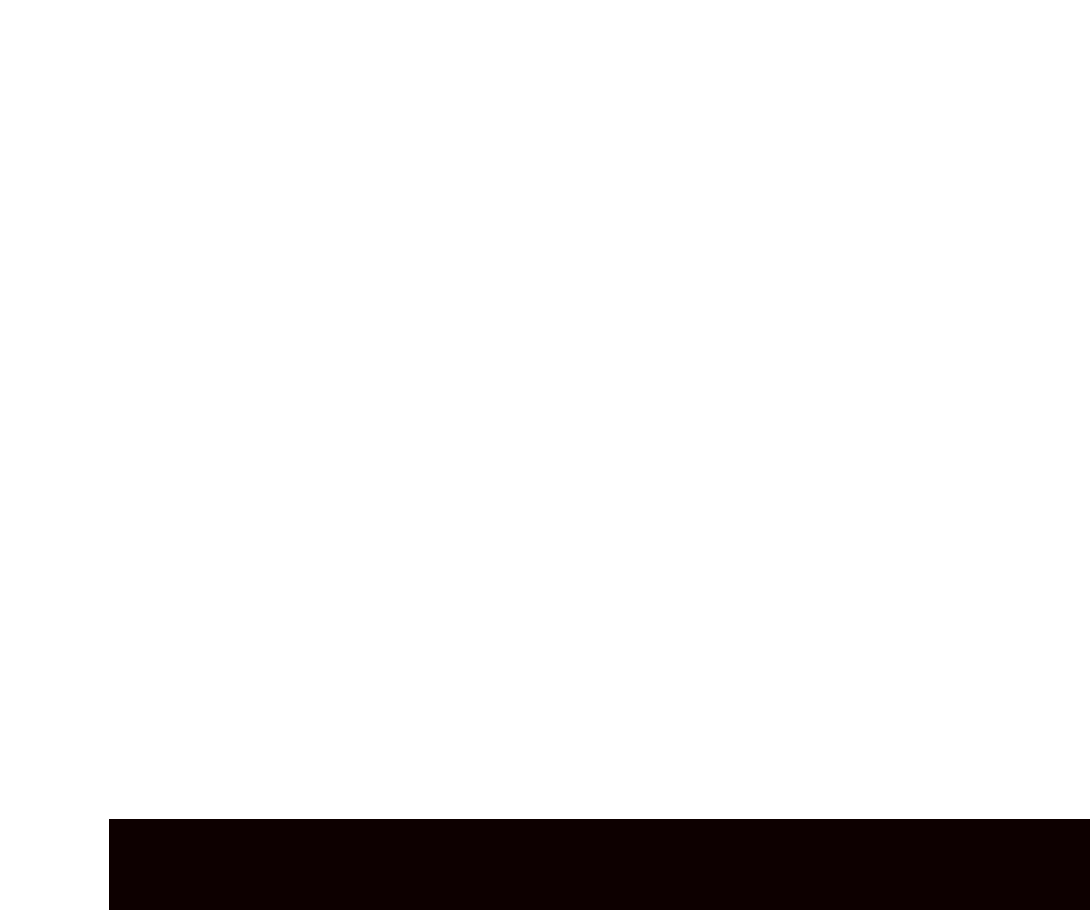

In [29]:
one_isc_result = np.zeros(1000)
one_isc_result[598] = 1  #note 920 here is definitely TPJ (overlap with neurosynth, can also look into others.)
isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
#result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

# visualize results
img = nilearn.plotting.view_img(    isc_r_brain, 
                                       bg_img       = './MNI152_T1_2mm.nii.gz');
img

In [30]:
isc_r_brain.to_filename('text920.nii')

In [31]:
ls

00_SaveEpisodes.ipynb       requirements.txt
01_ISC_allepisodes.ipynb    stimuli/
02_Load_ISC_plot.ipynb      sub-01_task-s01e02a.npy
Friends_Explor-Copy1.ipynb  sub-02_task-s01e02a.npy
Friends_Explor.ipynb        sub-03_task-s01e02a.npy
LICENSE                     sub-05_task-s01e02a.npy
MNI152_T1_2mm.nii.gz        test.h5
README.md                   text.nii
code/                       text920.nii
fmri/                       text922.nii
media/                      tutorial/


Text(0.5, 1.0, 'ISC in TPJ in red and Visual Cortex in green and Auditory Cortex in blue')

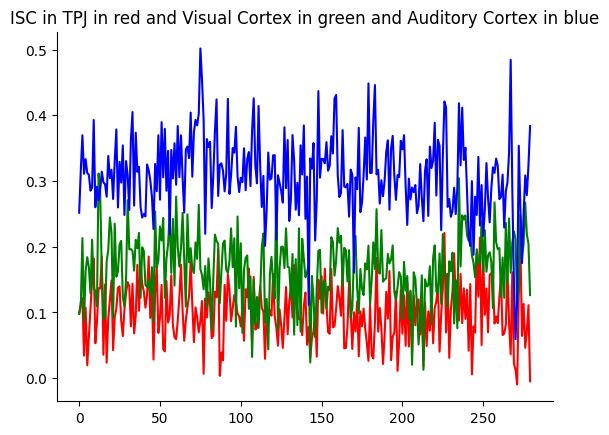

In [99]:
plt.plot(isc_results[:, 920], 'red')
plt.plot(isc_results[:, 545], 'green')
plt.plot(isc_results[:, 598], 'blue')

sns.despine()
plt.title('ISC in TPJ in red and Visual Cortex in green and Auditory Cortex in blue')

0.12044342830785282

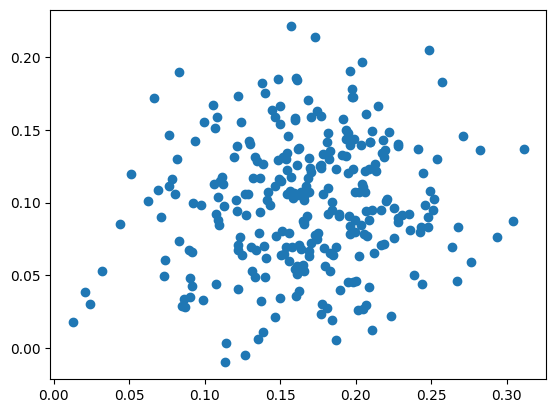

In [33]:
plt.scatter(isc_results[:, 545], isc_results[:, 920])
np.corrcoef(isc_results[:, 545], isc_results[:, 920])[0,1]

0.04012909962313587

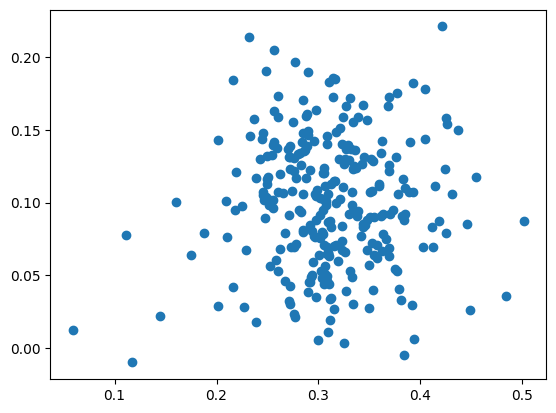

In [35]:
plt.scatter(isc_results[:, 598], isc_results[:, 920])
np.corrcoef(isc_results[:, 598], isc_results[:, 920])[0,1]

0.016311723548238007

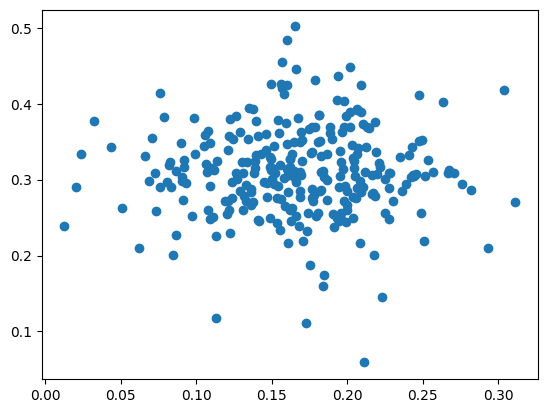

In [36]:
plt.scatter(isc_results[:, 545], isc_results[:, 598])
np.corrcoef(isc_results[:, 545], isc_results[:, 598])[0,1]

array([[1.        , 0.30986416],
       [0.30986416, 1.        ]])

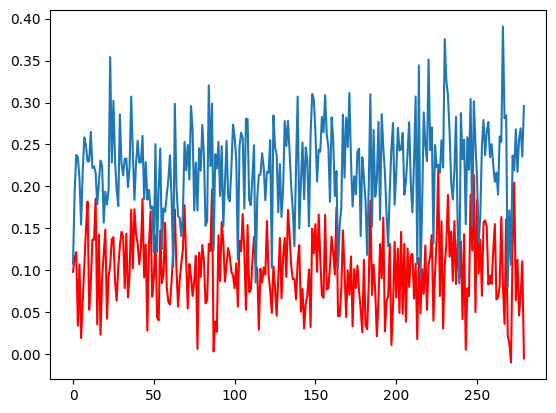

In [46]:
plt.plot(isc_results[:, 920], color = 'red')
plt.plot(isc_results[:, 380])

np.corrcoef(isc_results[:, 920],
            isc_results[:, 380])

/Users/schmaelz/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/schmaelz/miniconda3/lib/python3.10/site-packages/nilearn/image/resampling.py:291: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn(



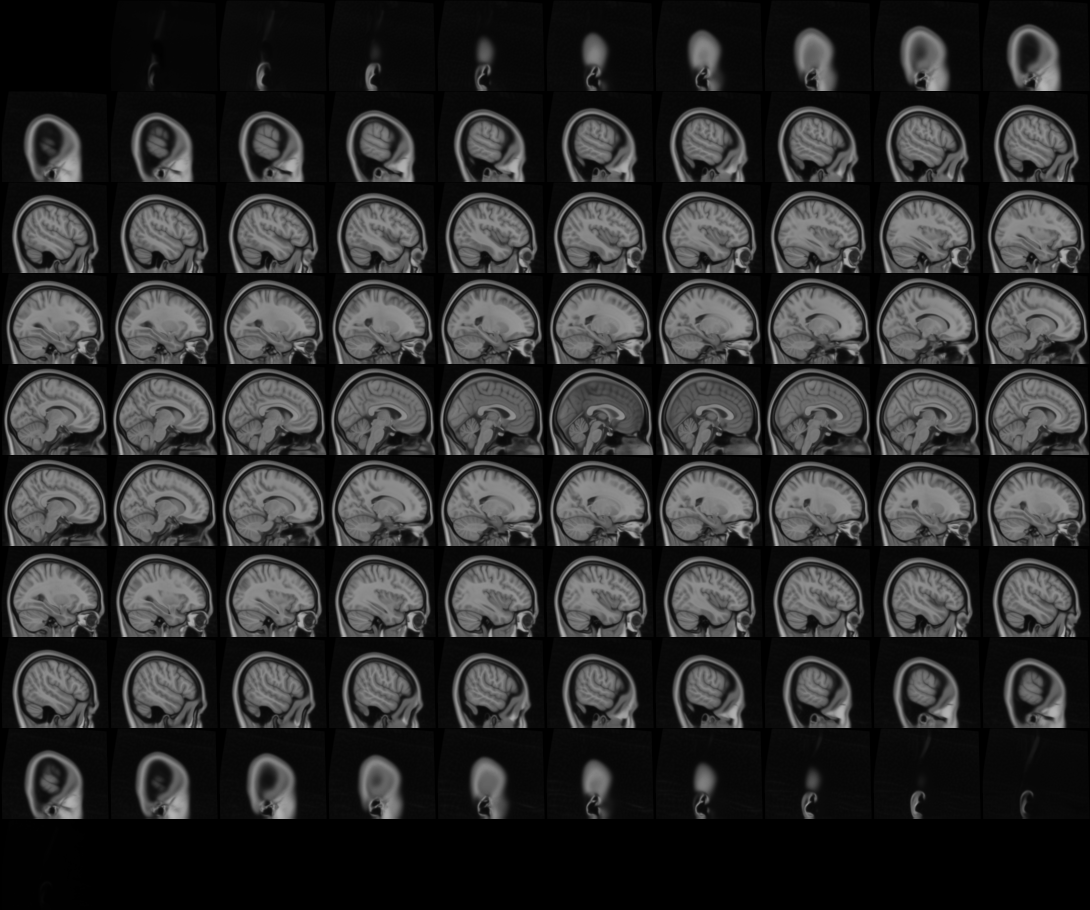
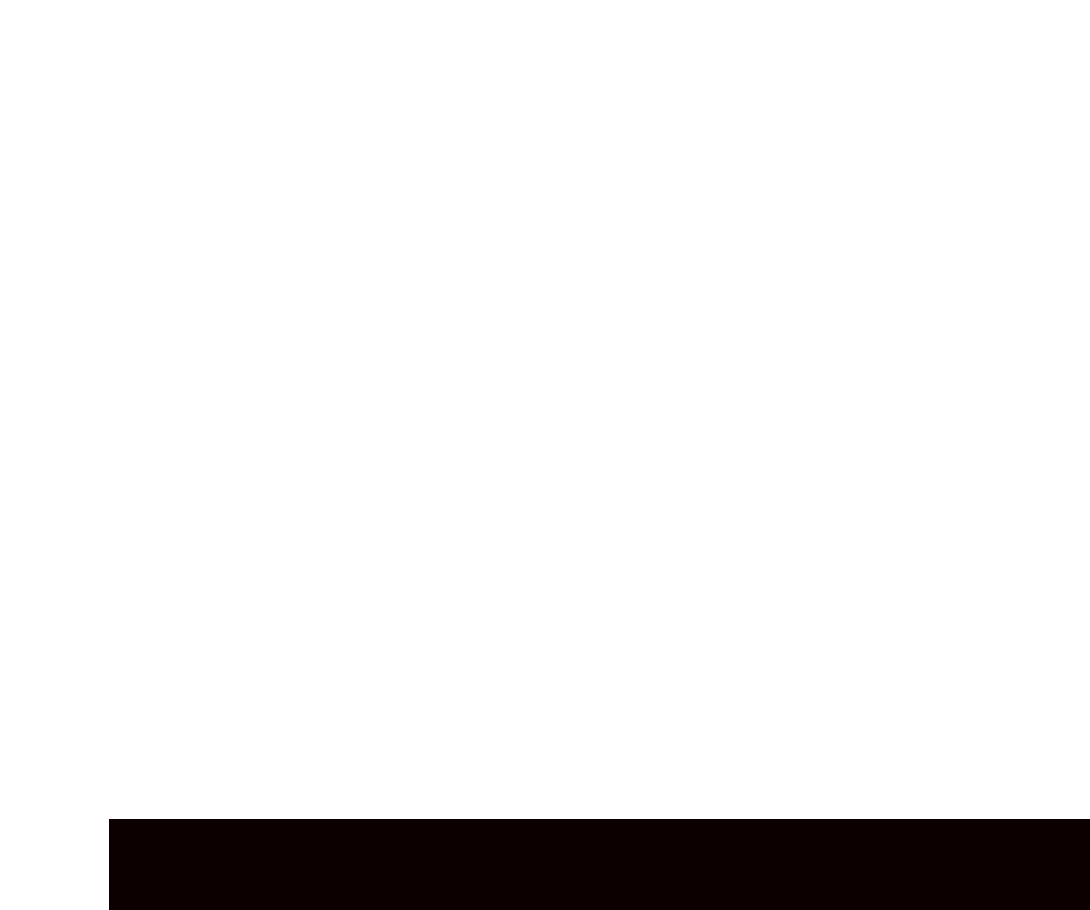

In [45]:
one_isc_result = np.zeros(1000)
one_isc_result[380] = 1  #note 920 here is definitely TPJ (overlap with neurosynth, can also look into others.)
one_isc_result[920] = 1 
isc_r_brain = roi_to_brain(pd.Series(one_isc_result), mask_x).to_nifti()
#result_image = threshold(isc_r_brain, isc_p_brain, thr=fdr(np.asarray(p_results), q = alpha)).to_nifti()

# visualize results
img = nilearn.plotting.view_img(    isc_r_brain, 
                                       bg_img       = './MNI152_T1_2mm.nii.gz');
img

In [47]:
isc_results.shape

(280, 1000)

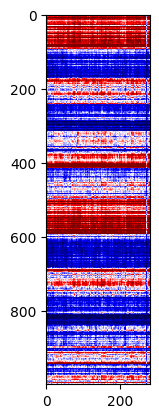

In [52]:
plt.imshow(isc_results.T, cmap = 'seismic', vmin = 0, vmax =0.3)

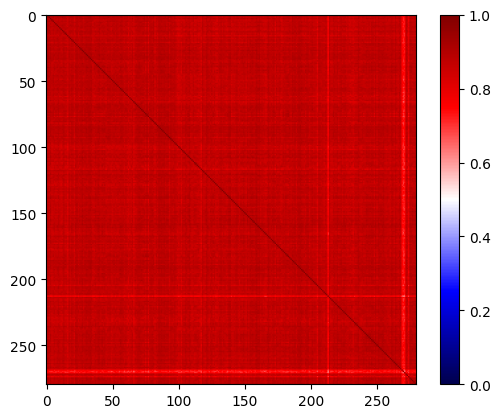

In [57]:
plt.imshow(np.corrcoef(isc_results), cmap = 'seismic', vmin = 0, vmax = 1)
plt.colorbar()

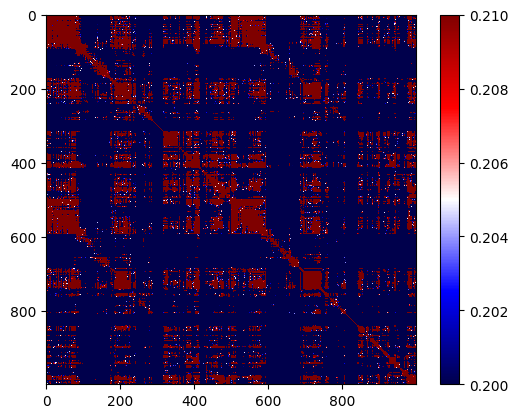

In [63]:
plt.imshow(np.corrcoef(isc_results.T), cmap = 'seismic', vmin = 0.2, vmax = .21)
plt.colorbar()